# ***JOB DESCRIPTION BASED RESUME MATCHER USING SENTIMENT ANALYSIS, TEXT SUMMARIZATION, KEYWORD EXTRACTION***



---



---


# 1. IMPORT LIBRARIES


---



---





> In this part, we will import all required packages and libraries which we will be using for further computation.



In [4]:
import numpy as nmp 
import pandas as pnd 
import nltk
import matplotlib.pyplot as pl0t
import seaborn as sbns
import re, os, string
import spacy
import warnings
warnings.filterwarnings("ignore")

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sian
from pprint import PrettyPrinter
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




---



---


# 2. READ AND PRE-PROCESS DATA


---



---





> In this part, we read the job description dataset using pandas. We then remove unwanted rows and columns. We remove the empty filled rows.



In [5]:
job_dataset = pnd.read_csv('/content/sample_data/monster_com-job_sample.csv')
job_dataset.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In [6]:
job_dataset.drop(['country', 'country_code','date_added','has_expired','job_board','job_type','location','organization','page_url','sector'], axis=1)

,job_description,job_title,salary,uniq_id
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,NaN,11d599f229a80023d2f40e7c52cd941e
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,NaN,e4cbb126dabf22159aff90223243ff2a
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,NaN,839106b353877fa3d896ffb9c1fe01c0
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,NaN,58435fcab804439efdcaa7ecca0fd783
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,NaN,64d0272dc8496abfd9523a8df63c184c
...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,"120,000.00 - 160,000.00 $ /yearbonus",a80bc8cc3a90c17eef418963803bc640
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,"45,000.00 - 60,000.00 $ /year",419a3714be2b30a10f628de207d041de
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,NaN,5a590350b73b2cec46b05750a208e345
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,25.00 - 28.00 $ /hour,40161cf61c283af9dc2b0a62947a5f1b


In [7]:
job_dataset = job_dataset[['job_description','uniq_id']].copy()

job_dataset = job_dataset.dropna()

#Lower-case all descriptions
job_dataset.title = job_dataset.job_description.str.lower()

#Remove handlers
job_dataset.title = job_dataset.job_description.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS
job_dataset.desc = job_dataset.job_description.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
job_dataset.desc = job_dataset.job_description.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
job_dataset.desc = job_dataset.job_description.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
job_dataset.desc = job_dataset.job_description.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))



In [8]:
job_dataset.dropna(subset=['job_description'], inplace=True)



---



---


# 3. SENTIMENT ANALYSIS


---



---





> Here we perform the sentiment analysis on the above job descriptions. We do the lexicon based sentiment analysis , not the machine learning based sentiment analysis as the available dataset does not contain any pre trained data. We use the VaderSentiment for the current task. Also, we use the textblob to do the above task.


> A set of words or phrases and the sentiment scores they correspond with make up VaderSentiment's vocabulary. The scores range from -1 to 1, with a score of 1 representing a strongly favorable feeling and a score of 0 representing a neutral sentiment. Also, the lexicon contains guidelines for dealing with negations, intensifiers, and other linguistic elements that can influence the tone of a document.





In [9]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.2 MB/s eta 0:00:00


In [10]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Sent_Analyser = SentimentIntensityAnalyzer()

In [11]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = Sent_Analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [12]:
job_dataset["sentiment"] = job_dataset["job_description"].apply(lambda review: Sent_Analyser.polarity_scores(review))

job_dataset.head()

,job_description,uniq_id,sentiment
0,TeamSoft is seeing an IT Support Specialist to...,11d599f229a80023d2f40e7c52cd941e,"{'neg': 0.009, 'neu': 0.822, 'pos': 0.169, 'co..."
1,The Wisconsin State Journal is seeking a flexi...,e4cbb126dabf22159aff90223243ff2a,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp..."
2,Report this job About the Job DePuy Synthes Co...,839106b353877fa3d896ffb9c1fe01c0,"{'neg': 0.004, 'neu': 0.857, 'pos': 0.139, 'co..."
3,Why Join Altec? If you’re considering a career...,58435fcab804439efdcaa7ecca0fd783,"{'neg': 0.024, 'neu': 0.811, 'pos': 0.164, 'co..."
4,Position ID# 76162 # Positions 1 State CT C...,64d0272dc8496abfd9523a8df63c184c,"{'neg': 0.011, 'neu': 0.875, 'pos': 0.115, 'co..."


In [13]:
from textblob import TextBlob

In [14]:
for text in job_dataset["job_description"]:
  if(TextBlob(text).sentiment.polarity>0):
    job_dataset["sentiment_class"]="positive"
  elif(TextBlob(text).sentiment.polarity<0):
    job_dataset["sentiment_class"]="negative"
  else:
    job_dataset["sentiment_class"]="neutral"


In [15]:
job_dataset.head()

,job_description,uniq_id,sentiment,sentiment_class
0,TeamSoft is seeing an IT Support Specialist to...,11d599f229a80023d2f40e7c52cd941e,"{'neg': 0.009, 'neu': 0.822, 'pos': 0.169, 'co...",positive
1,The Wisconsin State Journal is seeking a flexi...,e4cbb126dabf22159aff90223243ff2a,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...",positive
2,Report this job About the Job DePuy Synthes Co...,839106b353877fa3d896ffb9c1fe01c0,"{'neg': 0.004, 'neu': 0.857, 'pos': 0.139, 'co...",positive
3,Why Join Altec? If you’re considering a career...,58435fcab804439efdcaa7ecca0fd783,"{'neg': 0.024, 'neu': 0.811, 'pos': 0.164, 'co...",positive
4,Position ID# 76162 # Positions 1 State CT C...,64d0272dc8496abfd9523a8df63c184c,"{'neg': 0.011, 'neu': 0.875, 'pos': 0.115, 'co...",positive


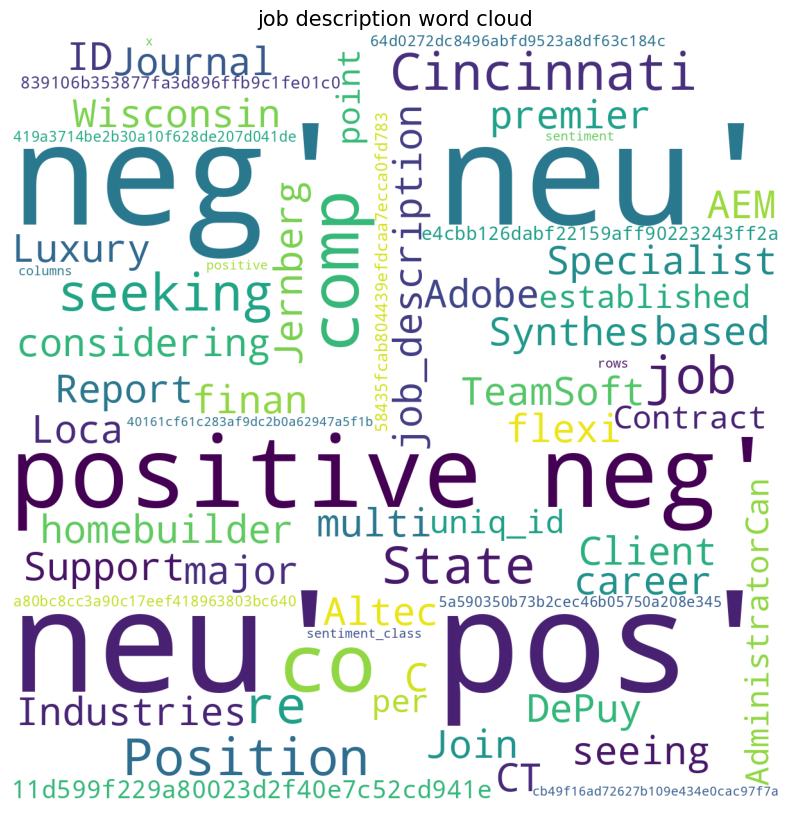

In [16]:
from wordcloud import WordCloud
positive = job_dataset[job_dataset['sentiment']==1]

pl0t.rcParams['figure.figsize']=(10,10)
pl0t.style.use('fast')


wc=WordCloud(background_color='white',width=1200,height=1200).generate(str(job_dataset))
pl0t.title('job description word cloud',fontsize=15)
pl0t.imshow(wc)
pl0t.axis('off')
pl0t.show()

In [17]:
# total number of positive and negative sentiments
l = len(job_dataset[job_dataset['sentiment_class'] == 'negative'])
print(f"negative sentences= {l} ")

m = len(job_dataset[job_dataset['sentiment_class'] == 'positive'])
print(f" positive sentences= {m}")

m = len(job_dataset[job_dataset['sentiment_class'] == 'neutral'])
print(f" neutral sentences= {m}")

negative sentences= 0 
 positive sentences= 22000
 neutral sentences= 0


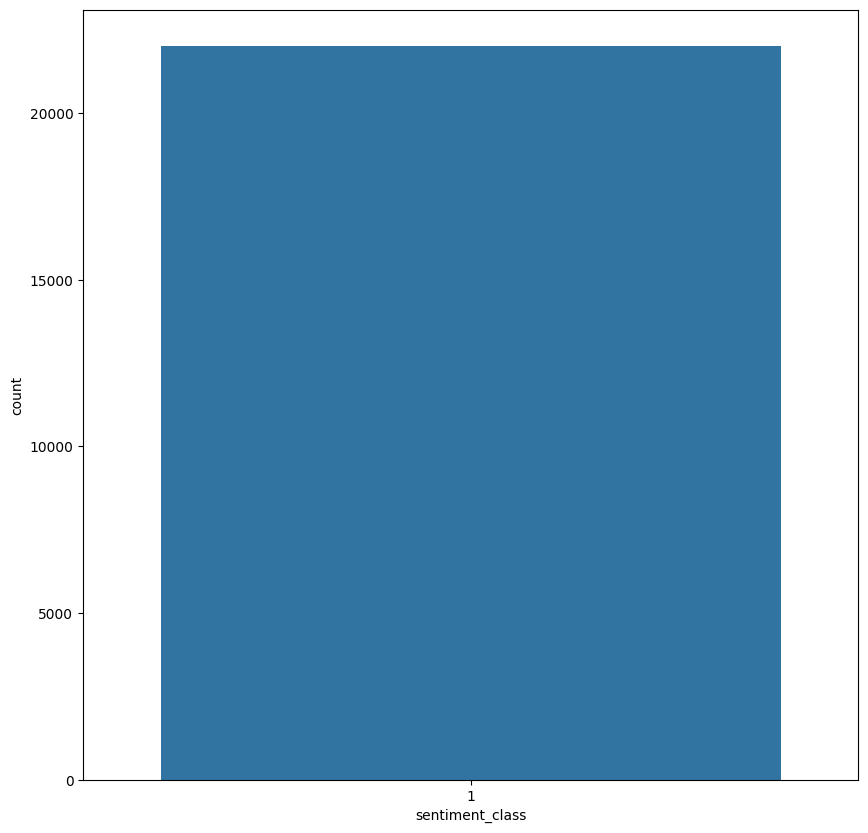

In [18]:
job_dataset['sentiment_class'] = job_dataset['sentiment_class'].map({'positive':1,'negative':-1,'neutral':0},na_action=None)
count = sbns.countplot(data=job_dataset,x='sentiment_class',order=job_dataset['sentiment_class'].value_counts().index)
pl0t.show()



---



---


# 4. TEXT SUMMARIZATION


---



---





> In this part, we do the text summarization on the job description dataset. For every job description form the dataset, we extract the brief summary and add it to the dataframe. We create a spacy pipeline and define a summary function.


> Text summarization is a natural language processing (NLP) technique that includes condensing a text while keeping the key points. Text summary aims to provide a condensed version of a text that captures the key ideas and is simpler to read and comprehend.





In [19]:
! pip install pytextrank
import pytextrank #ranking text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:

pp = PrettyPrinter()

In [21]:
job_dataset.info() # infor about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_description  22000 non-null  object
 1   uniq_id          22000 non-null  object
 2   sentiment        22000 non-null  object
 3   sentiment_class  22000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 687.6+ KB


In [22]:
# Create spaCy pipeline and add textrank to it
import spacy.cli

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("textrank")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [28]:
def summary_for_article(num,prin=False):
    
    sum = "" # collecting the summary from the generator
    document = nlp(job_dataset.job_description[num]) #apply the pipeline
    
    for i in document._.textrank.summary(limit_phrases=10, limit_sentences=1): #get the summary
        sum+=str(i)
        
    phrases_n_ranks = [ (phrase.chunks[0], phrase.rank) for phrase in document._.phrases] # get important phrases
    
    if prin: 
        print(job_dataset.job_description[num])
        print("\n_______ to ______\n")
        print(sum)
      
        
    return sum

In [31]:
for i in range(0,100):
    print("\n....",i,"")
    #summary_for_article(i,True);
    job_dataset["summary"]=summary_for_article(i,True)


.... 0 
TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:• Call tracking software• Phone based technical support• Problem documentation and communication• Remote Desktop Management Tools• Respond to customer requests• General understanding of LANDesk• Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?• TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!• TeamSoft has been in business since 1996• TeamSoft's owners are local IT professionals 



---



---


# 5. KEYWORD EXTRACTION FROM RESUME DATASET


---



---





> In this part, we extract the keywords from the resume dataset which is required for the other part of our project. We first read and pre-process our data and then apply different pre-processing functions on the data. We also use TfIdfVectorizer and extract the top keywords from the resume description and then add it to the dataframe.Keyword extraction involves locating the most crucial words or phrases in a text. To help with tasks like document categorization, topic modeling, and information retrieval, keyword extraction aims to identify the major subjects or themes in a document or corpus.



In [34]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stop_words = f.readlines()
        stopwords_set = set(m.strip() for m in stop_words)
        return list(frozenset(stopwords_set))

In [35]:
def clean_text(text):
    """Doc cleaning"""
    
    # Lowering text
    text = text.lower()
    
    # Removing punctuation
    text = "".join([c for c in text if c not in PUNCTUATION])
    
    # Removing whitespace and newlines
    text = re.sub('\s+',' ',text)
    
    return text

In [36]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [37]:
def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,TOP_K_KEYWORDS)
    
    return list(keywords.keys())

In [38]:
# Constants
PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""" 
TOP_K_KEYWORDS = 10 # top k number of keywords to retrieve in a ranked document
STOPWORD_PATH = "/content/sample_data/stopwords.txt"
Resume_PATH = "/content/sample_data/Resume.csv"

In [39]:
data = pnd.read_csv(Resume_PATH)
data.drop(["Resume_html"],axis=1)
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [40]:
data.dropna(subset=['Resume_str'], inplace=True)

In [41]:
data['Resume_str'] = data['Resume_str'].apply(clean_text)
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,hr administratormarketing associate hr admini...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,hr specialist us hr operations summary versat...,"<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,hr director summary over 20 years experience ...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,hr specialist summary dedicated driven and dy...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,hr manager skill highlights hr skills hr depa...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [42]:
corpora = data['Resume_str'].to_list()

In [43]:
#load a set of stop words
stopwords=get_stopwords_list(STOPWORD_PATH)

# Initializing TF-IDF Vectorizer with stopwords
vector = TfidfVectorizer(stop_words=stopwords, smooth_idf=True, use_idf=True)

# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vector.fit_transform(corpora[10::])

# Storing vocab
ftr_names = vector.get_feature_names_out()

In [44]:
rslt = []
for docment in corpora[0:10]:
    KW_dataset = {}
    KW_dataset['Resume_str'] = docment
    KW_dataset['top_keywords'] = get_keywords(vector, ftr_names, docment)
    rslt.append(KW_dataset)
    
output = pnd.DataFrame(rslt)
output

,Resume_str,top_keywords
0,hr administratormarketing associate hr admini...,"[marketing, dec, medical, relations, customer,..."
1,hr specialist us hr operations summary versat...,"[marketing, hr, sharepoint, materials, brochur..."
2,hr director summary over 20 years experience ...,"[hris, friends, hr, kansas, adjutant, topeka, ..."
3,hr specialist summary dedicated driven and dy...,"[call, 10key, touch, customer, hr, comments, w..."
4,hr manager skill highlights hr skills hr depa...,"[hr, employee, human, benefits, jan, compensat..."
5,hr generalist summary dedicated and focused a...,"[nonimmigrant, uscis, petitions, 112008, perfo..."
6,hr manager summary human resources manager ex...,"[hr, training, staff, tesol, development, huma..."
7,hr manager professional summary senior hr pro...,"[employee, benefits, human, employees, resourc..."
8,hr specialist summary possess 15 years of exp...,"[hr, statewide, salary, recruitment, pay, comp..."
9,hr clerk summary translates business vision i...,"[hr, shrm, employee, compensation, administrat..."




---



---
# End of Project Increment1


---



---

